#  LR Implementation on Apple Stock Data (MSFT) - Yuanxing

Reference (continue to be updated):
- https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
- https://github.com/SeanPLeary/time-series-h2o-automl-example/blob/master/h2o_automl_example_with_multivariate_time_series.ipynb

In [1]:
# import packages
import pandas as pd
import numpy as np

# to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

# setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# for normalizing data (why?)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# read the file
df = pd.read_csv('../datasets/stocks/MSFT.csv')

# print the tail
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8579,2020-03-26,148.399994,156.660004,148.369995,156.110001,156.110001,64568100
8580,2020-03-27,151.750000,154.889999,149.199997,149.699997,149.699997,57042300
8581,2020-03-30,152.440002,160.600006,150.009995,160.229996,160.229996,63420300
8582,2020-03-31,159.399994,164.779999,156.559998,157.710007,157.710007,77927200
8583,2020-04-01,153.000000,157.750000,150.820007,152.110001,152.110001,57858300


Text(0, 0.5, 'Close Price')

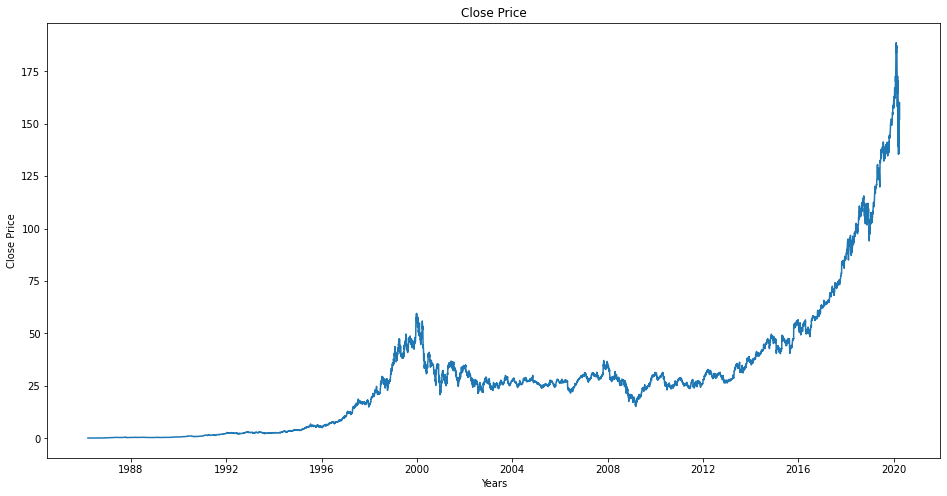

In [2]:
# setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title("Close Price")
plt.xlabel("Years")
plt.ylabel("Close Price")

From the above graph, data before 2010 (or 2015) doesn't seem to be very representive.

In [3]:
# discard data before year 2015
df = df[df['Date'] >= '2015-01-01']
df.drop('Date', axis=1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.864841,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,41.479866,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.871037,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,41.390320,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,42.607944,29645200
...,...,...,...,...,...,...
2020-03-26,148.399994,156.660004,148.369995,156.110001,156.110001,64568100
2020-03-27,151.750000,154.889999,149.199997,149.699997,149.699997,57042300
2020-03-30,152.440002,160.600006,150.009995,160.229996,160.229996,63420300


## Daily with 1 step and 5 steps, with or without Volume

In [4]:
df_processed = df.copy()

# leave Close only
df_processed = df_processed[['Close', 'Volume']]

num_lags = 5 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df_processed:
    for lag in range(1,num_lags+1):
        df_processed[column + '_lag' + str(lag)] = df_processed[column].shift(lag*-1-(delay-1))      

df_processed.drop('Volume', axis=1)
df_processed.dropna(inplace=True)

df_processed

,Close,Volume,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5
Date,,,,,,,,,,,,
2015-01-02,46.759998,27913900,46.330002,45.650002,46.230000,47.590000,47.189999,39673900.0,36447900.0,29114100.0,29645200.0,23944200.0
2015-01-05,46.330002,39673900,45.650002,46.230000,47.590000,47.189999,46.599998,36447900.0,29114100.0,29645200.0,23944200.0,23651900.0
2015-01-06,45.650002,36447900,46.230000,47.590000,47.189999,46.599998,46.360001,29114100.0,29645200.0,23944200.0,23651900.0,35270600.0
2015-01-07,46.230000,29114100,47.590000,47.189999,46.599998,46.360001,45.959999,29645200.0,23944200.0,23651900.0,35270600.0,29719600.0
2015-01-08,47.590000,29645200,47.189999,46.599998,46.360001,45.959999,45.480000,23944200.0,23651900.0,35270600.0,29719600.0,32750800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-19,142.710007,85922700,137.350006,135.979996,148.339996,146.919998,156.110001,84866200.0,78975200.0,82516700.0,75638200.0,64568100.0
2020-03-20,137.350006,84866200,135.979996,148.339996,146.919998,156.110001,149.699997,78975200.0,82516700.0,75638200.0,64568100.0,57042300.0
2020-03-23,135.979996,78975200,148.339996,146.919998,156.110001,149.699997,160.229996,82516700.0,75638200.0,64568100.0,57042300.0,63420300.0


In [5]:
df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.7),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.7):,:]

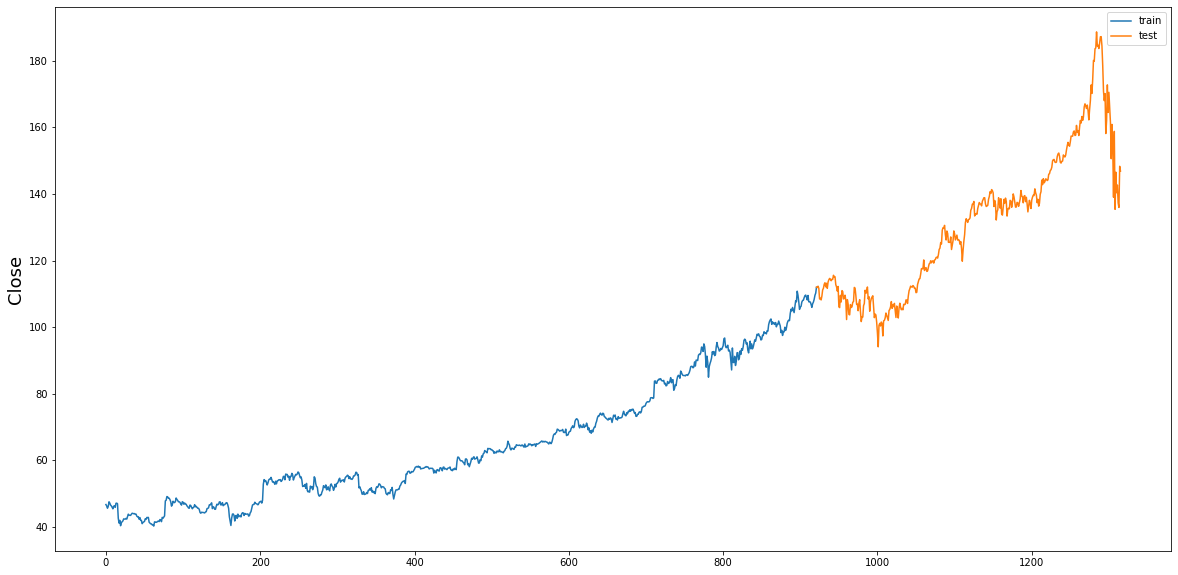

In [6]:
plt.plot(df_train.index,df_train['Close'])
plt.plot(df_test.index,df_test['Close'])
plt.ylabel('Close',fontsize=18)
plt.legend(['train','test'])
plt.show()

### Data Splitting

In [7]:
# 1 step Close only
x_train_lag1 = df_train[['Close_lag1']]

# 1 step Close and Vol
mask_lag1_with_vol = df_train.columns.str.contains('lag1')
x_train_lag1_with_vol = df_train[df_train.columns[mask_lag1_with_vol]]

# 5 steps Close only
mask_lag5 = df_train.columns.str.contains('Close_lag')
x_train_lag5 = df_train[df_train.columns[mask_lag5]]

# 5 step Close and Vol
x_train_lag5_with_vol = df_train.drop('Close', axis=1)

y_train = df_train['Close']

### Test Data ###
# 1 step Close only
x_test_lag1 = df_test[['Close_lag1']]

# 1 step Close and Vol
x_test_lag1_with_vol = df_test[df_test.columns[mask_lag1_with_vol]]

# 5 steps Close only
x_test_lag5 = df_test[df_test.columns[mask_lag5]]

# 5 step Close and Vol
x_test_lag5_with_vol = df_test.drop('Close', axis=1)

y_test = df_test['Close']

In [8]:
# implement linear regression
from sklearn.linear_model import LinearRegression
# 1 step Close only
model_lag1 = LinearRegression()
model_lag1.fit(x_train_lag1, y_train)

# 1 step Close and Vol
model_lag1_with_vol = LinearRegression()
model_lag1_with_vol.fit(x_train_lag1_with_vol, y_train)

# 5 steps Close only
model_lag5 = LinearRegression()
model_lag5.fit(x_train_lag5, y_train)

# 5 steps Close and Vol
model_lag5_with_vol = LinearRegression()
model_lag5_with_vol.fit(x_train_lag5_with_vol, y_train)

# make predictions and find the rmse
preds_lag1 = model_lag1.predict(x_test_lag1)
preds_lag1_with_vol = model_lag1_with_vol.predict(x_test_lag1_with_vol)
preds_lag5 = model_lag5.predict(x_test_lag5)
preds_lag5_with_vol = model_lag5_with_vol.predict(x_test_lag5_with_vol)

rms_lag1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1)),2)))
rms_lag1_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1_with_vol)),2)))
rms_lag5=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5)),2)))
rms_lag5_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5_with_vol)),2)))

print('rms_lag1: ', rms_lag1)
print('rms_lag1_with_vol: ', rms_lag1_with_vol)
print('rms_lag5: ', rms_lag5)
print('rms_lag5_with_vol: ', rms_lag5_with_vol)

rms_lag1:  3.0577602967629223
rms_lag1_with_vol:  3.048217856761641
rms_lag5:  2.9809288239524285
rms_lag5_with_vol:  2.953146862904946


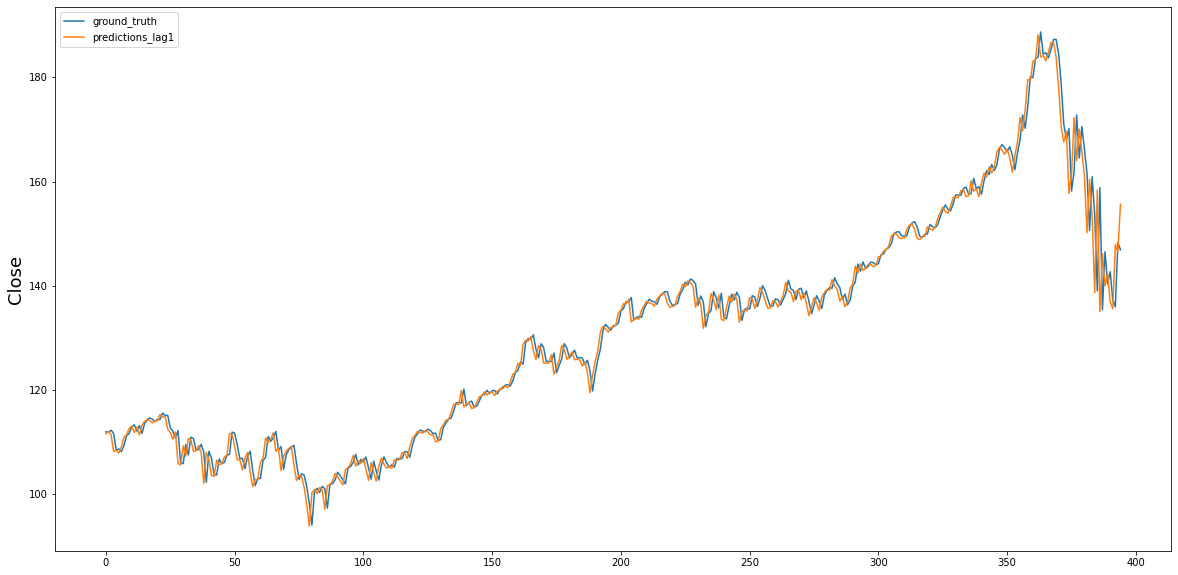

In [9]:
# plot 1 step Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag1'] = preds_lag1

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag1'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag1'])
plt.show()

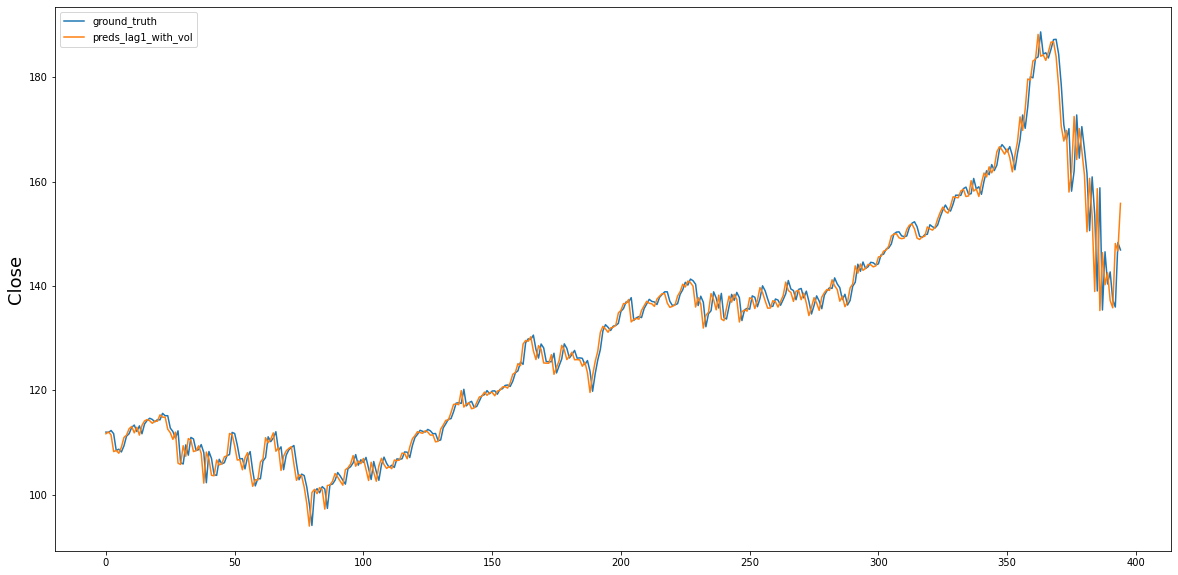

In [10]:
# plot 1 step Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag1_with_vol'] = preds_lag1_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag1_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag1_with_vol'])
plt.show()

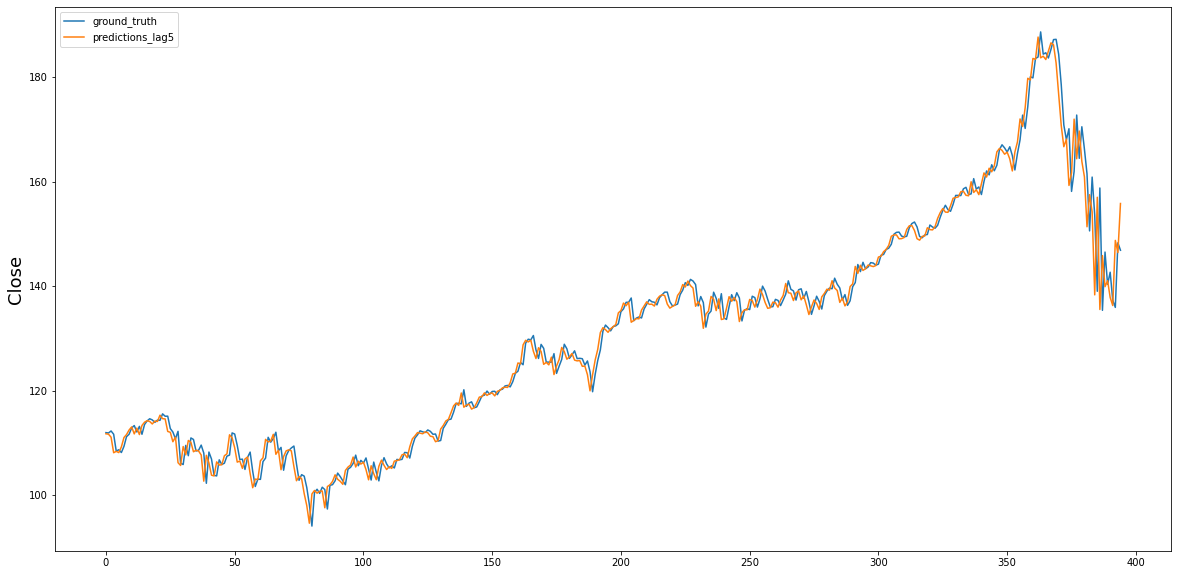

In [11]:
# Plot 5 steps Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag5'] = preds_lag5

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag5'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag5'])
plt.show()

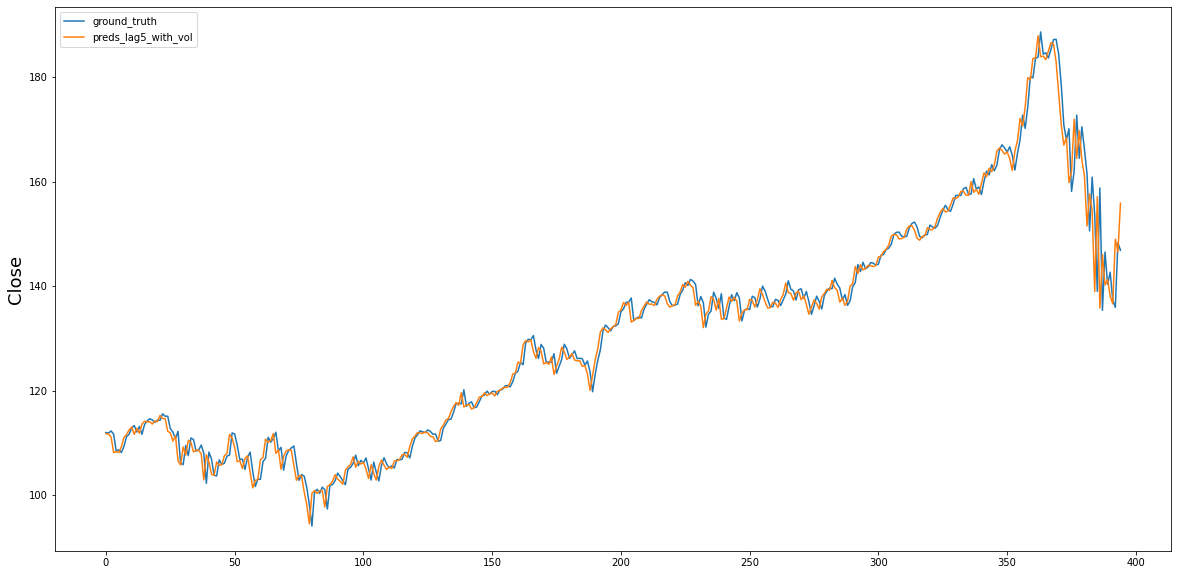

In [12]:
# Plot 5 steps Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag5_with_vol'] = preds_lag5_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag5_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag5_with_vol'])
plt.show()

## Weekly

In [13]:
df_weekly = df.resample('W').mean()
df_weekly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-04,46.660000,47.419998,46.540001,46.759998,41.864841,2.791390e+07
2015-01-11,46.618000,47.102000,46.180001,46.598000,41.719797,3.176506e+07
2015-01-18,46.376000,46.870000,45.724000,46.128000,41.299001,3.141764e+07
2015-01-25,46.495000,46.830000,45.982500,46.655000,41.770827,3.433815e+07
2015-02-01,43.034000,43.364001,42.130000,42.653999,38.188685,8.755736e+07
...,...,...,...,...,...,...
2020-03-08,167.252002,170.519998,162.375998,167.138000,167.138000,6.263212e+07
2020-03-15,151.818002,158.372000,146.607999,152.612000,152.612000,7.561982e+07
2020-03-22,141.354001,148.020001,135.976001,140.490002,140.490002,8.426956e+07


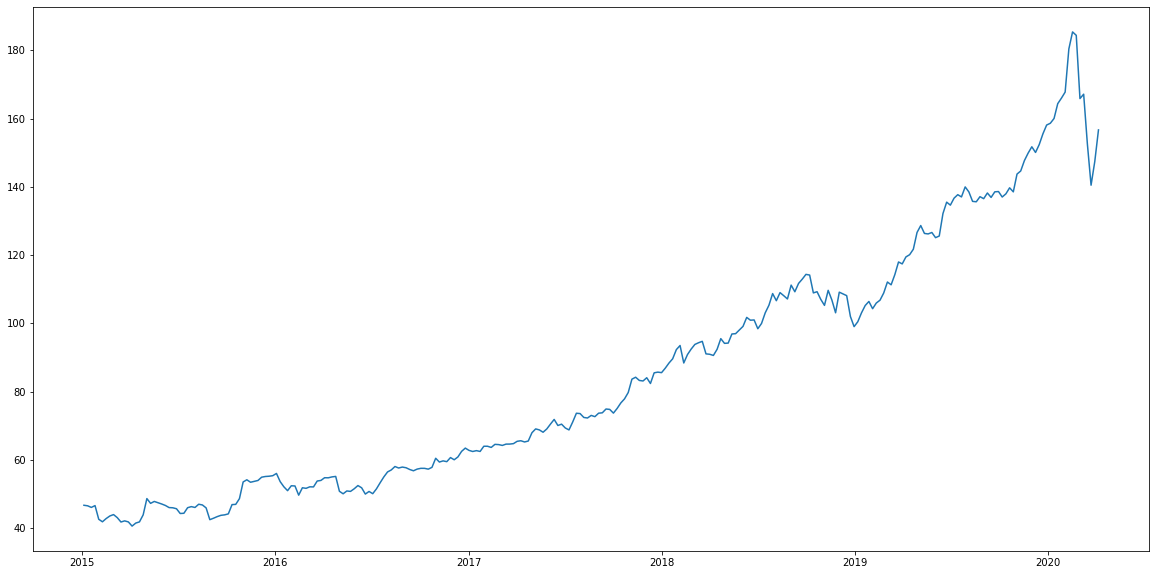

In [14]:
plt.plot(df_weekly['Close'], label='Close Price Weekly')

In [15]:
df_processed = df_weekly.copy()

# leave Close only
df_processed = df_processed[['Close', 'Volume']]

num_lags = 5 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df_processed:
    for lag in range(1,num_lags+1):
        df_processed[column + '_lag' + str(lag)] = df_processed[column].shift(lag*-1-(delay-1))      

df_processed.drop('Volume', axis=1)
df_processed.dropna(inplace=True)

df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.7),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.7):,:]

# 1 step Close only
x_train_lag1 = df_train[['Close_lag1']]

# 1 step Close and Vol
mask_lag1_with_vol = df_train.columns.str.contains('lag1')
x_train_lag1_with_vol = df_train[df_train.columns[mask_lag1_with_vol]]

# 5 steps Close only
mask_lag5 = df_train.columns.str.contains('Close_lag')
x_train_lag5 = df_train[df_train.columns[mask_lag5]]

# 5 step Close and Vol
x_train_lag5_with_vol = df_train.drop('Close', axis=1)

y_train = df_train['Close']

### Test Data ###
# 1 step Close only
x_test_lag1 = df_test[['Close_lag1']]

# 1 step Close and Vol
x_test_lag1_with_vol = df_test[df_test.columns[mask_lag1_with_vol]]

# 5 steps Close only
x_test_lag5 = df_test[df_test.columns[mask_lag5]]

# 5 step Close and Vol
x_test_lag5_with_vol = df_test.drop('Close', axis=1)

y_test = df_test['Close']

# implement linear regression
from sklearn.linear_model import LinearRegression
# 1 step Close only
model_lag1 = LinearRegression()
model_lag1.fit(x_train_lag1, y_train)

# 1 step Close and Vol
model_lag1_with_vol = LinearRegression()
model_lag1_with_vol.fit(x_train_lag1_with_vol, y_train)

# 5 steps Close only
model_lag5 = LinearRegression()
model_lag5.fit(x_train_lag5, y_train)

# 5 steps Close and Vol
model_lag5_with_vol = LinearRegression()
model_lag5_with_vol.fit(x_train_lag5_with_vol, y_train)

# make predictions and find the rmse
preds_lag1 = model_lag1.predict(x_test_lag1)
preds_lag1_with_vol = model_lag1_with_vol.predict(x_test_lag1_with_vol)
preds_lag5 = model_lag5.predict(x_test_lag5)
preds_lag5_with_vol = model_lag5_with_vol.predict(x_test_lag5_with_vol)

rms_lag1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1)),2)))
rms_lag1_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1_with_vol)),2)))
rms_lag5=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5)),2)))
rms_lag5_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5_with_vol)),2)))

print('rms_lag1: ', rms_lag1)
print('rms_lag1_with_vol: ', rms_lag1_with_vol)
print('rms_lag5: ', rms_lag5)
print('rms_lag5_with_vol: ', rms_lag5_with_vol)

rms_lag1:  3.473880328149071
rms_lag1_with_vol:  3.3391413311081957
rms_lag5:  3.560474859037772
rms_lag5_with_vol:  3.3498152485984773


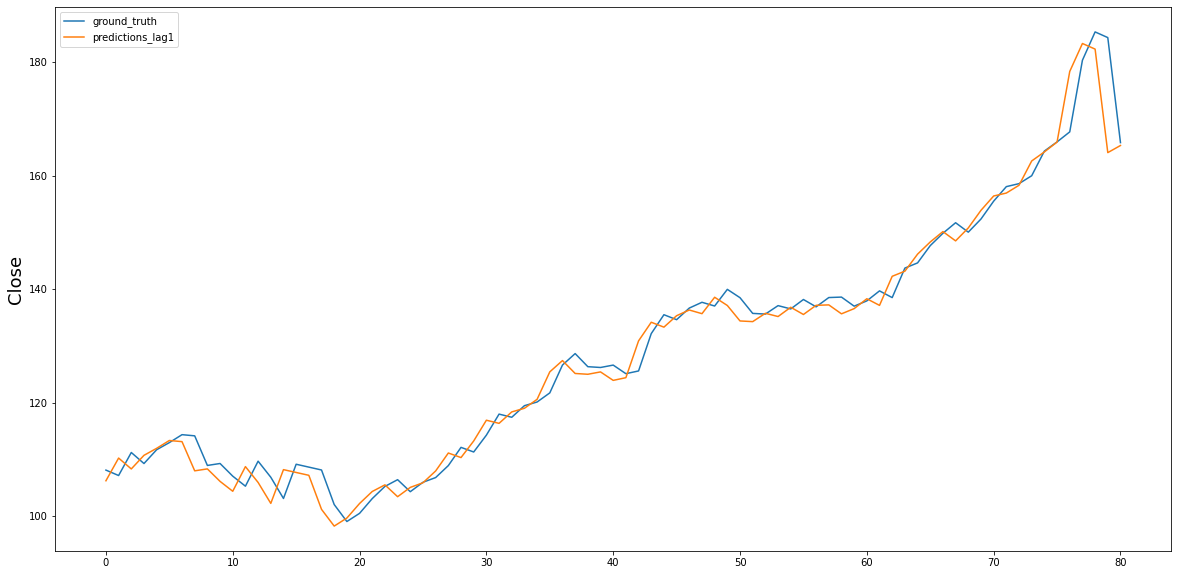

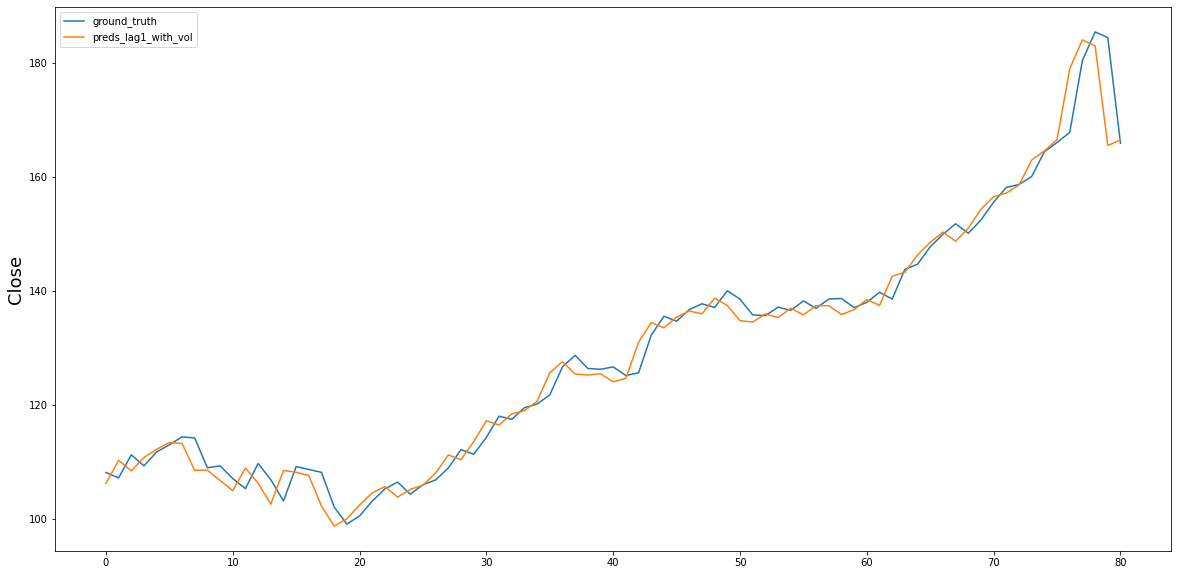

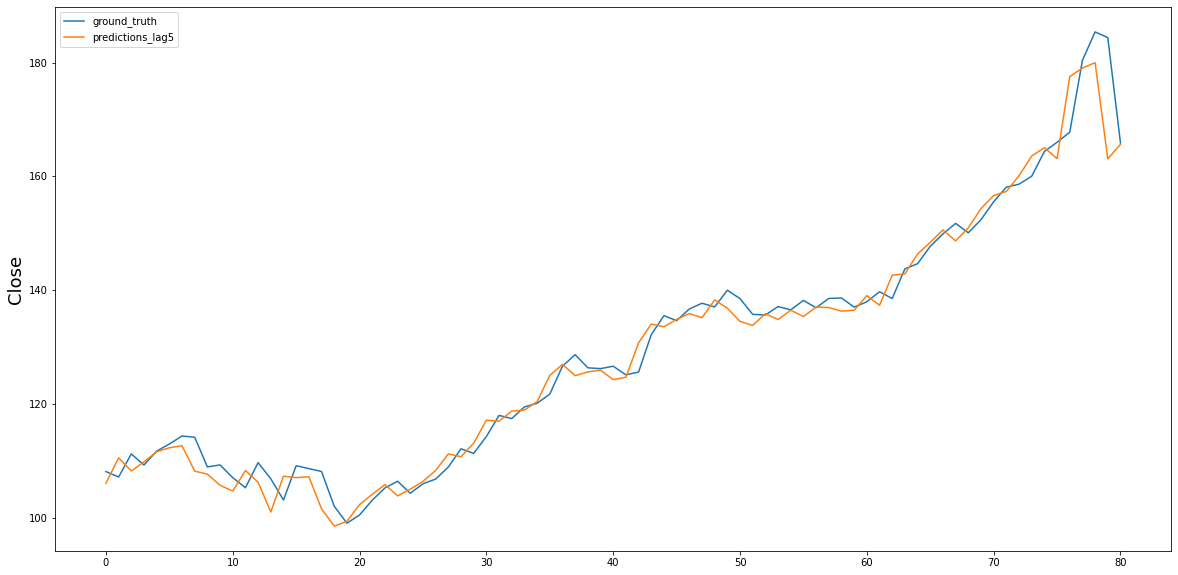

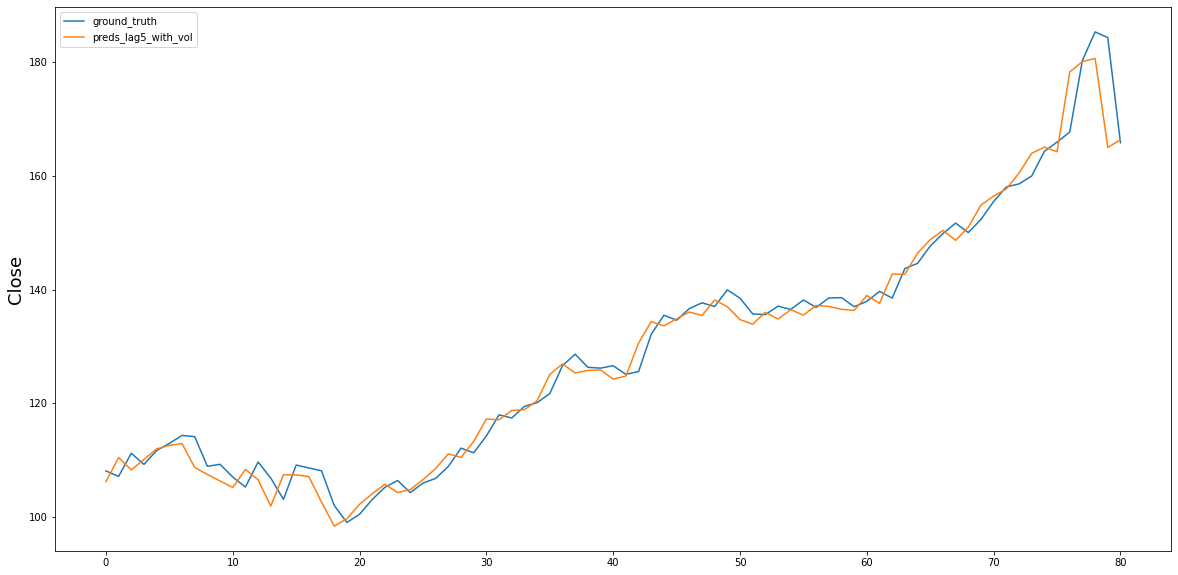

In [16]:
# plot 1 step Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag1'] = preds_lag1

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag1'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag1'])
plt.show()

# plot 1 step Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag1_with_vol'] = preds_lag1_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag1_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag1_with_vol'])
plt.show()

# Plot 5 steps Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag5'] = preds_lag5

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag5'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag5'])
plt.show()

# Plot 5 steps Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag5_with_vol'] = preds_lag5_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag5_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag5_with_vol'])
plt.show()

## Monthly

In [17]:
df_monthly = df.resample('M').mean()
df_monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-31,45.639000,46.071000,45.032000,45.514000,40.749278,4.594834e+07
2015-02-28,42.996843,43.272632,42.671052,43.078421,38.701005,3.455314e+07
2015-03-31,42.140000,42.528182,41.848182,42.131818,37.989614,3.746979e+07
2015-04-30,43.071905,43.736667,42.870952,43.466666,39.193227,4.164454e+07
2015-05-31,47.587000,47.977000,47.185500,47.530000,42.967825,3.165364e+07
...,...,...,...,...,...,...
2019-12-31,153.981429,154.770477,153.164285,154.179525,153.759549,2.144301e+07
2020-01-31,163.973333,164.980953,162.692856,163.999046,163.552323,2.659667e+07
2020-02-29,178.566316,181.360000,175.851052,178.719474,178.430442,4.671712e+07


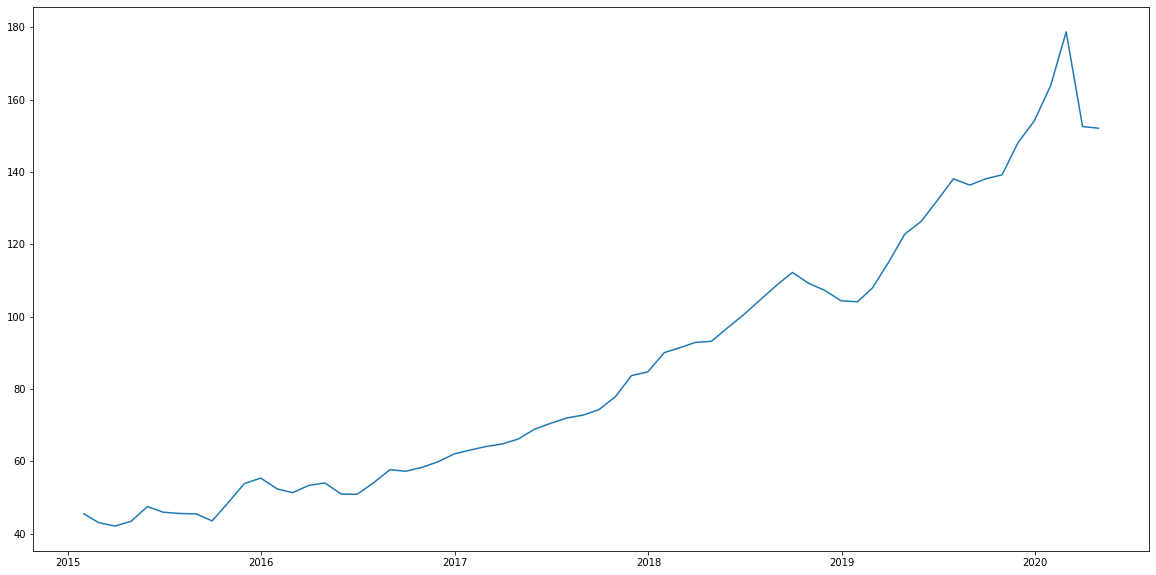

In [18]:
plt.plot(df_monthly['Close'], label='Close Price Monthly')

In [19]:
df_processed = df_monthly.copy()

# leave Close only
df_processed = df_processed[['Close', 'Volume']]

num_lags = 5 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df_processed:
    for lag in range(1,num_lags+1):
        df_processed[column + '_lag' + str(lag)] = df_processed[column].shift(lag*-1-(delay-1))      

df_processed.drop('Volume', axis=1)
df_processed.dropna(inplace=True)

df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.7),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.7):,:]

# 1 step Close only
x_train_lag1 = df_train[['Close_lag1']]

# 1 step Close and Vol
mask_lag1_with_vol = df_train.columns.str.contains('lag1')
x_train_lag1_with_vol = df_train[df_train.columns[mask_lag1_with_vol]]

# 5 steps Close only
mask_lag5 = df_train.columns.str.contains('Close_lag')
x_train_lag5 = df_train[df_train.columns[mask_lag5]]

# 5 step Close and Vol
x_train_lag5_with_vol = df_train.drop('Close', axis=1)

y_train = df_train['Close']

### Test Data ###
# 1 step Close only
x_test_lag1 = df_test[['Close_lag1']]

# 1 step Close and Vol
x_test_lag1_with_vol = df_test[df_test.columns[mask_lag1_with_vol]]

# 5 steps Close only
x_test_lag5 = df_test[df_test.columns[mask_lag5]]

# 5 step Close and Vol
x_test_lag5_with_vol = df_test.drop('Close', axis=1)

y_test = df_test['Close']

# implement linear regression
from sklearn.linear_model import LinearRegression
# 1 step Close only
model_lag1 = LinearRegression()
model_lag1.fit(x_train_lag1, y_train)

# 1 step Close and Vol
model_lag1_with_vol = LinearRegression()
model_lag1_with_vol.fit(x_train_lag1_with_vol, y_train)

# 5 steps Close only
model_lag5 = LinearRegression()
model_lag5.fit(x_train_lag5, y_train)

# 5 steps Close and Vol
model_lag5_with_vol = LinearRegression()
model_lag5_with_vol.fit(x_train_lag5_with_vol, y_train)

# make predictions and find the rmse
preds_lag1 = model_lag1.predict(x_test_lag1)
preds_lag1_with_vol = model_lag1_with_vol.predict(x_test_lag1_with_vol)
preds_lag5 = model_lag5.predict(x_test_lag5)
preds_lag5_with_vol = model_lag5_with_vol.predict(x_test_lag5_with_vol)

rms_lag1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1)),2)))
rms_lag1_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1_with_vol)),2)))
rms_lag5=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5)),2)))
rms_lag5_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5_with_vol)),2)))

print('rms_lag1: ', rms_lag1)
print('rms_lag1_with_vol: ', rms_lag1_with_vol)
print('rms_lag5: ', rms_lag5)
print('rms_lag5_with_vol: ', rms_lag5_with_vol)

rms_lag1:  3.8139443426454327
rms_lag1_with_vol:  3.421799912740118
rms_lag5:  4.538394061665358
rms_lag5_with_vol:  4.326870310680843


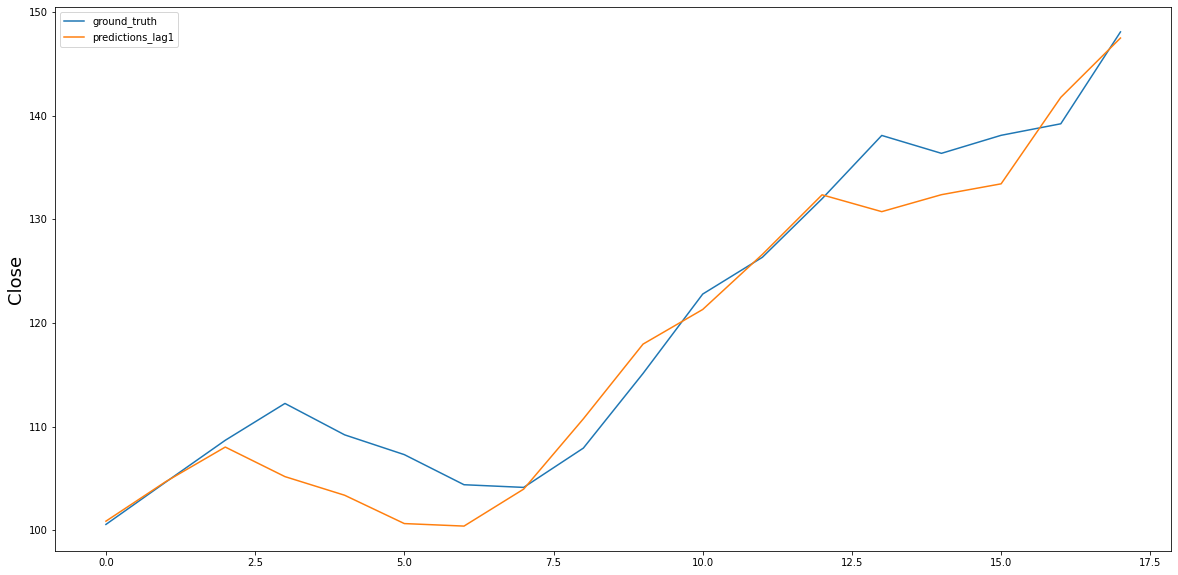

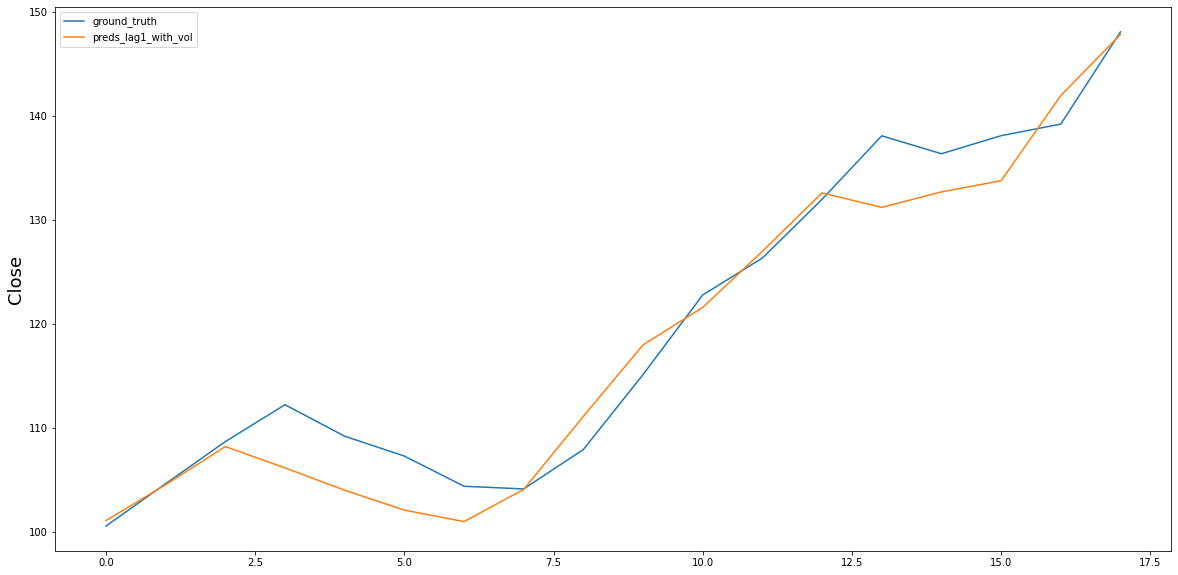

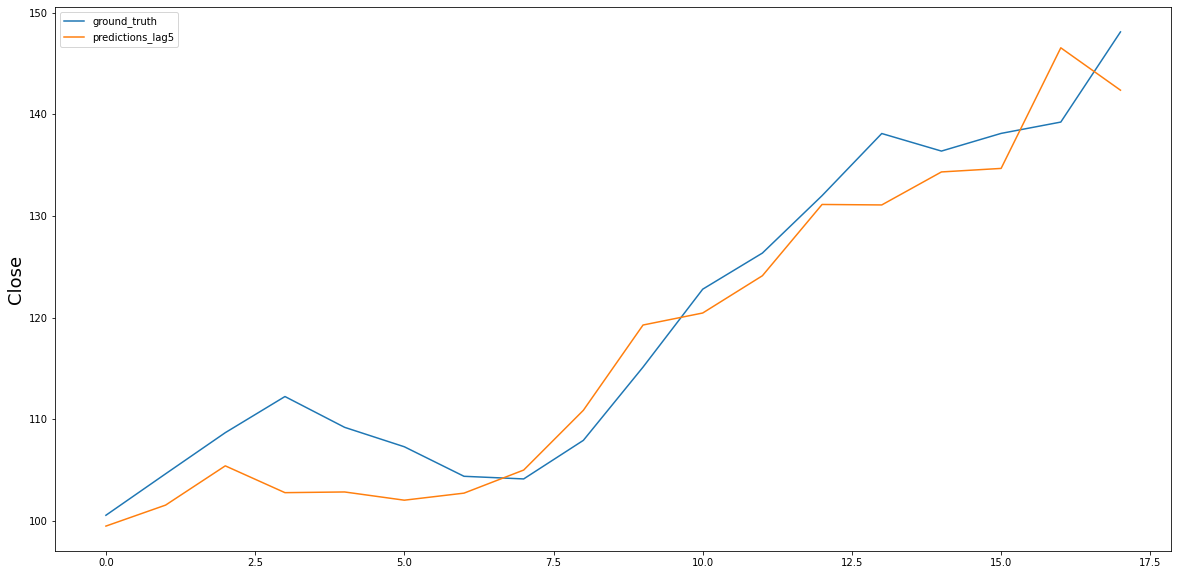

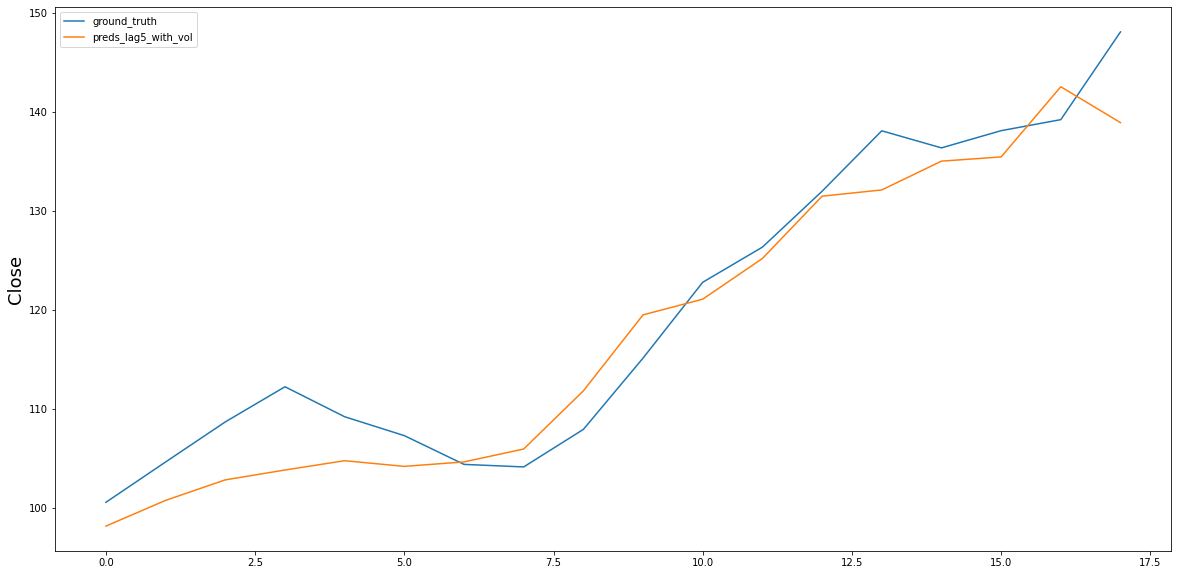

In [20]:
# plot 1 step Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag1'] = preds_lag1

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag1'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag1'])
plt.show()

# plot 1 step Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag1_with_vol'] = preds_lag1_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag1_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag1_with_vol'])
plt.show()

# Plot 5 steps Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag5'] = preds_lag5

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag5'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag5'])
plt.show()

# Plot 5 steps Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag5_with_vol'] = preds_lag5_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag5_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag5_with_vol'])
plt.show()